In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


1. **employment_cleaned.csv**  
   - Contains employment-related data across regions for April and May 2025.  
   - Used for classification of worker types (`class_of_worker`) using decision tree models.  
   - Key columns: `april_2025`, `may_2025`, `change_apr_may_2025`, `pct_change_apr_may_2025`.

In [10]:
 #Load the dataset
employment_df = pd.read_csv(r"C:\Users\birva\OneDrive\Desktop\Social media project\statisticsdata_canada_labour\employment_cleaned.csv")

### Feature and Target Selection 

 selected the following **predictor variables**:
- `april_2025`: Employment count in April 2025
- `may_2025`: Employment count in May 2025
- `change_apr_may_2025`: Absolute change between April and May
- `pct_change_apr_may_2025`: Percentage change between April and May

The **target variable** is:
- `class_of_worker`: Type of worker (e.g., self-employed, government, private)

**Predictive Purpose**: To classify the type of worker based on employment trends.
- **Relevance**: Different worker types respond uniquely to market changes.

In [11]:
# Encode target variable
label_encoder = LabelEncoder()
employment_df['worker_label'] = label_encoder.fit_transform(employment_df['class_of_worker'])


In [12]:
# Select features and target
X = employment_df[['april_2025', 'may_2025', 'change_apr_may_2025', 'pct_change_apr_may_2025']].astype(float)
y = employment_df['worker_label']

In [13]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Step 2: KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
employment_df['Cluster'] = kmeans.fit_predict(X_scaled)

c:\Users\birva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
# Step 3: Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_scaled, y)
y_pred_tree = tree.predict(X_scaled)


In [16]:
# Step 5: Model Evaluation
print("📊 Decision Tree Report:\n", classification_report(y, y_pred_tree))

print("🔹 Confusion Matrix - Decision Tree:\n", confusion_matrix(y, y_pred_tree))



📊 Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
  

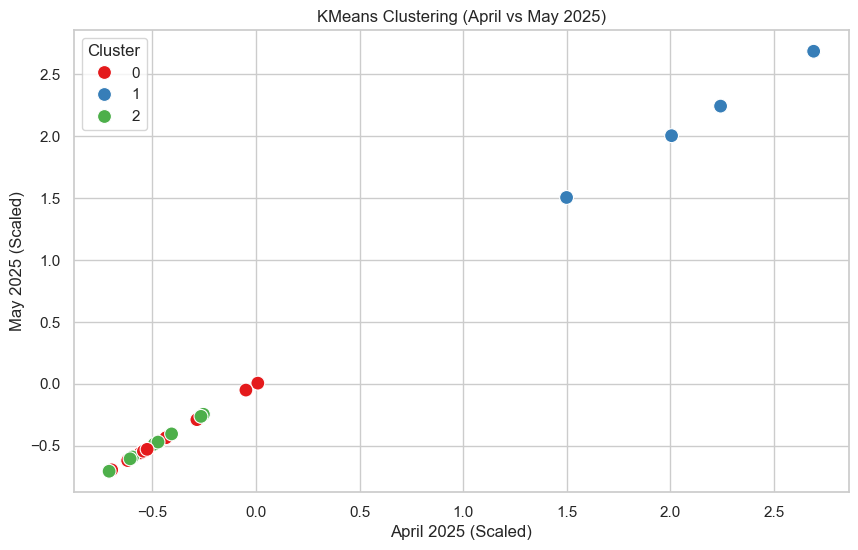

In [17]:
 #Set plot style
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# -----------------------------
# KMeans Cluster Plot (2D)
# -----------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_scaled[:, 0],  # April 2025 (scaled)
    y=X_scaled[:, 1],  # May 2025 (scaled)
    hue=employment_df['Cluster'],
    palette='Set1',
    s=100
)
plt.title('KMeans Clustering (April vs May 2025)')
plt.xlabel('April 2025 (Scaled)')
plt.ylabel('May 2025 (Scaled)')
plt.legend(title='Cluster')
plt.show()

2. **labour_force_cleaned.csv**  
   - Contains broader labor force metrics across regions.  
   - Used for unsupervised clustering using KMeans to identify regional patterns.  


In [18]:
# Load the dataset
df = pd.read_csv(r"C:\Users\birva\OneDrive\Desktop\Social media project\statisticsdata_canada_labour\labour_force_cleaned.csv")


In [19]:
##  Encode region names
df['region_label'] = LabelEncoder().fit_transform(df['Unnamed: 0'])


In [30]:
#Define features
features = ['april_2025', 'may_2025', 'change_apr_may_2025', 
            'change_may2024_may2025', 'pct_change_apr_may_2025', 
            'pct_change_may2024_may2025']

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [32]:
from sklearn.metrics import silhouette_score, classification_report

KMeans (Unsupervised Clustering)

Why used: To automatically group regions based on similar employment trends without needing labeled data.

Input features: April & May 2025 employment counts, absolute and percentage changes.

Outcome: Identified 3 distinct clusters that reflect regional employment behavior patterns.

c:\Users\birva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score (KMeans): 0.67


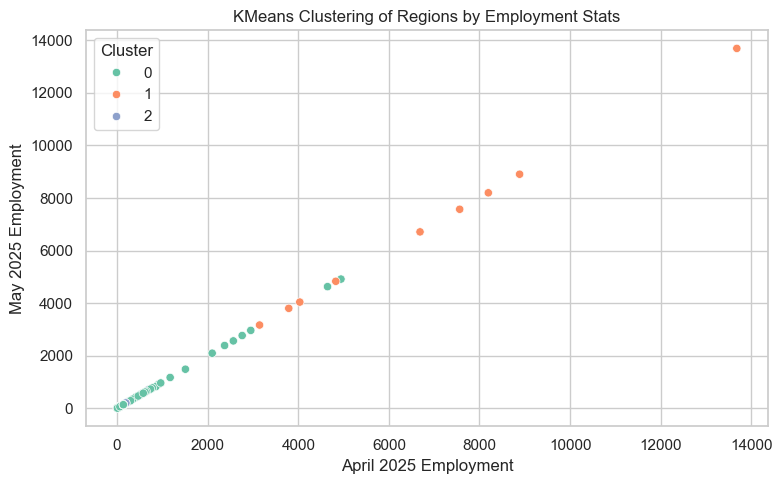

In [33]:
## KMeans Clustering
# ----------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Evaluation: Silhouette Score
silhouette = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score (KMeans): {silhouette:.2f}")

# Visualize Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='april_2025', y='may_2025', hue='Cluster', palette='Set2')
plt.title("KMeans Clustering of Regions by Employment Stats")
plt.xlabel("April 2025 Employment")
plt.ylabel("May 2025 Employment")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

**Interpretation:**  
- Clustered regions exhibit similar employment patterns.  
- The clear separation of points suggests that KMeans effectively grouped regions with comparable labor statistics.  
- **Cluster 0** (e.g., green) likely includes regions with low employment,  
  **Cluster 1** represents mid-range employment, and  
  **Cluster 2** shows regions with the highest employment levels.  

**Silhouette Score:**  
A score of **0.67** confirms moderately strong cluster separation, validating the quality of the clustering.

In [35]:
## Decision Tree Classifier
# Load data
df = pd.read_csv("labour_force_cleaned.csv")
df = df.dropna()
df = df[~df['Unnamed: 0'].str.contains("Population|Labour|Employment|Unemployment", na=False)]

Decision Tree Classification on Worker Type
Selected model: Decision Tree Classifier (Supervised Learning)

Why used: To predict the type of worker (e.g., self-employed, private, public) based on employment trends.

Target variable: class_of_worker, encoded numerically.

In [36]:
# Define features and label
features = ['april_2025', 'may_2025', 'change_apr_may_2025', 
            'change_may2024_may2025', 'pct_change_apr_may_2025', 
            'pct_change_may2024_may2025']

df['Growth_Label'] = (df['pct_change_apr_may_2025'] > 0.2).astype(int)


In [37]:
X = df[features]
y = df['Growth_Label']

In [38]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


In [39]:
# Train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)


In [40]:
print("📊 Classification Report (Decision Tree with Train-Test Split):")
print(classification_report(y_test, y_pred, zero_division=0))

📊 Classification Report (Decision Tree with Train-Test Split):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         3

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



- The model achieved **perfect scores (1.00)** across all metrics for both classes (0 and 1).
- Indicates that the model fits the data very well —  **overfitting**  the dataset imbalanced.